In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,RobustScaler,OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('CUSTOMER_SEGMENTATION.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9995 entries, 0 to 9994
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9995 non-null   int64  
 1   Gender              9995 non-null   object 
 2   Age                 9995 non-null   int64  
 3   Profession_Code     9995 non-null   object 
 4   Work_Experience     9995 non-null   int64  
 5   Family_Size         9995 non-null   int64  
 6   Annual_Median       9995 non-null   int64  
 7   Occupation_Name     9995 non-null   object 
 8   Card_Avg            8020 non-null   float64
 9   Check_Avg           8101 non-null   float64
 10  Deposit_Avg         8154 non-null   float64
 11  Loan_Payment_Avg    8102 non-null   float64
 12  Transfer_Avg        8129 non-null   float64
 13  Withdrawal_Avg      8118 non-null   float64
 14  Card_Count          8020 non-null   float64
 15  Check_Count         8101 non-null   float64
 16  Deposi

In [5]:
df.head(5)

,Customer_ID,Gender,Age,Profession_Code,Work_Experience,Family_Size,Annual_Median,Occupation_Name,Card_Avg,Check_Avg,Deposit_Avg,Loan_Payment_Avg,Transfer_Avg,Withdrawal_Avg,Card_Count,Check_Count,Deposit_Count,Loan_Payment_Count,Transfer_Count,Withdrawal_Count
0,1000,Male,19,53-0000,1,3,37940,Transportation and Material Moving Occupations,29.70,3323.04,53392.84,22722.13,NaN,793.09,1.0,2.0,1.0,1.0,NaN,2.0
1,1001,Female,31,25-3031,6,2,35250,"Substitute Teachers, Short-Term",52.77,7874.51,52811.10,16223.55,2030.74,1539.00,4.0,6.0,1.0,2.0,2.0,1.0
2,1002,Male,23,41-0000,1,2,35290,Sales and Related Occupations,NaN,4051.47,26184.28,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN
3,1003,Female,35,15-1244,9,4,90520,Network and Computer Systems Administrators,19.48,3339.02,NaN,25074.55,903.15,1329.38,1.0,2.0,NaN,3.0,1.0,2.0
4,1004,Female,24,53-7000,2,1,35670,Material Moving Workers,NaN,5802.39,18112.69,NaN,1515.54,583.86,NaN,4.0,1.0,NaN,3.0,1.0


In [6]:
df.isnull().sum()

Customer_ID              0
Gender                   0
Age                      0
Profession_Code          0
Work_Experience          0
Family_Size              0
Annual_Median            0
Occupation_Name          0
Card_Avg              1975
Check_Avg             1894
Deposit_Avg           1841
Loan_Payment_Avg      1893
Transfer_Avg          1866
Withdrawal_Avg        1877
Card_Count            1975
Check_Count           1894
Deposit_Count         1841
Loan_Payment_Count    1893
Transfer_Count        1866
Withdrawal_Count      1877
dtype: int64

In [7]:
# There are many na values indicating that the there are customers who might not be doing the required transaction
#type.

## 1. Simple method 1 :
Filling NA values with 0

In [8]:
df=df.fillna(0)

In [9]:
df.isnull().sum()

Customer_ID           0
Gender                0
Age                   0
Profession_Code       0
Work_Experience       0
Family_Size           0
Annual_Median         0
Occupation_Name       0
Card_Avg              0
Check_Avg             0
Deposit_Avg           0
Loan_Payment_Avg      0
Transfer_Avg          0
Withdrawal_Avg        0
Card_Count            0
Check_Count           0
Deposit_Count         0
Loan_Payment_Count    0
Transfer_Count        0
Withdrawal_Count      0
dtype: int64

In [10]:
df.columns

Index(['Customer_ID', 'Gender', 'Age', 'Profession_Code', 'Work_Experience',
       'Family_Size', 'Annual_Median', 'Occupation_Name', 'Card_Avg',
       'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
       'Withdrawal_Avg', 'Card_Count', 'Check_Count', 'Deposit_Count',
       'Loan_Payment_Count', 'Transfer_Count', 'Withdrawal_Count'],
      dtype='object')

In [11]:
columns_to_cluster=['Gender','Profession_Code','Age','Work_Experience',
       'Family_Size', 'Annual_Median', 'Card_Avg',
       'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
       'Withdrawal_Avg', 'Card_Count', 'Check_Count', 'Deposit_Count',
       'Loan_Payment_Count', 'Transfer_Count', 'Withdrawal_Count']

# Seperating numeric columns and categorical columns
numeric_cols = ['Age', 'Work_Experience', 'Family_Size', 'Annual_Median','Card_Avg',
       'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
       'Withdrawal_Avg', 'Card_Count', 'Check_Count', 'Deposit_Count',
       'Loan_Payment_Count', 'Transfer_Count', 'Withdrawal_Count']
categorical_cols = ['Gender','Profession_Code']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Fitting the preprocessor and transforming the data
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_prepared = pipeline.fit_transform(df[columns_to_cluster])







### Elbow Method: 
It involves plotting the variance explained by different numbers of clusters and identifying the “elbow” point, where the rate of variance decreases sharply levels off, suggesting an appropriate cluster count for analysis and model training.

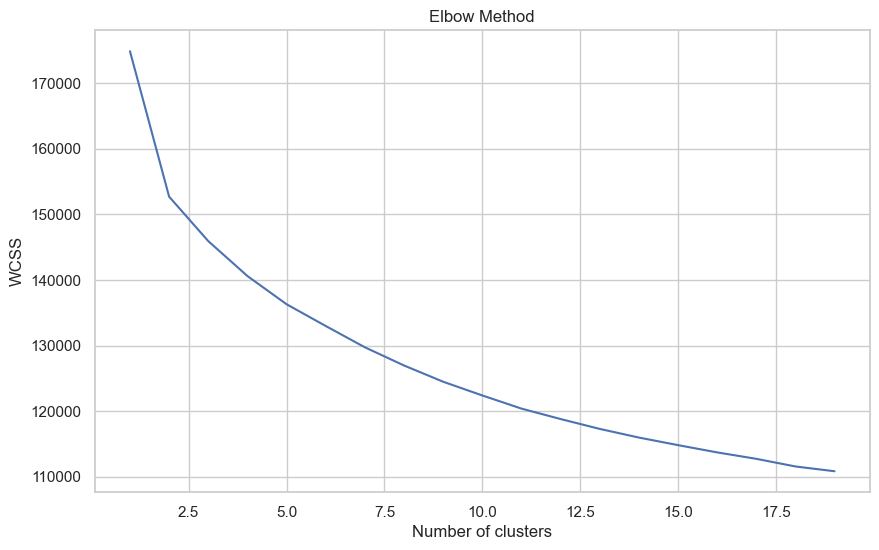

In [65]:
# Choose the number of clusters with the elbow method
# WCSS is the sum of the squared distance between each point and the centroid in a cluster. Our main goal
# is to get WCSS as low as possible.

wcss = []
for i in range(1, 20): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_prepared)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.grid(True)
plt.show()

At n_clusters=10 we can observe the bend and after that the WCSS almost remains the same

In [67]:
# Performing clustering
kmeans = KMeans(n_clusters=10)  
clusters = kmeans.fit_predict(data_prepared)

df['Cluster'] = clusters

In [68]:
df.head(5)

,Customer_ID,Gender,Age,Profession_Code,Work_Experience,Family_Size,Annual_Median,Occupation_Name,Card_Avg,Check_Avg,...,Loan_Payment_Avg,Transfer_Avg,Withdrawal_Avg,Card_Count,Check_Count,Deposit_Count,Loan_Payment_Count,Transfer_Count,Withdrawal_Count,Cluster
0,1000,Male,19,53-0000,1,3,37940,Transportation and Material Moving Occupations,29.70,3323.04,...,22722.13,0.00,793.09,1.0,2.0,1.0,1.0,0.0,2.0,9
1,1001,Female,31,25-3031,6,2,35250,"Substitute Teachers, Short-Term",52.77,7874.51,...,16223.55,2030.74,1539.00,4.0,6.0,1.0,2.0,2.0,1.0,0
2,1002,Male,23,41-0000,1,2,35290,Sales and Related Occupations,0.00,4051.47,...,0.00,0.00,0.00,0.0,1.0,2.0,0.0,0.0,0.0,2
3,1003,Female,35,15-1244,9,4,90520,Network and Computer Systems Administrators,19.48,3339.02,...,25074.55,903.15,1329.38,1.0,2.0,0.0,3.0,1.0,2.0,8
4,1004,Female,24,53-7000,2,1,35670,Material Moving Workers,0.00,5802.39,...,0.00,1515.54,583.86,0.0,4.0,1.0,0.0,3.0,1.0,2


Validating the performance of the model using silhouette_score . 
The score ranges from -1 to 1 . 
1. A score close to +1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. This suggests that the clustering is appropriate.
2. A score close to 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters.
3. A score close to -1 indicates that the object is likely assigned to the wrong cluster.

In most of the customer segmentation and real world scenarios any value greater than 0.5 is acceptable

In [69]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(data_prepared,clusters)
print("The average silhouette_score is :", silhouette_avg)


The average silhouette_score is : 0.059148437770740844


silhouette_score of 0.059 indicates poor clustering. Need a better solution

### Checking with DBSCAN method

In [72]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10) 

clusters_dbscan = dbscan.fit_predict(data_prepared)

df['Cluster_DBSCAN'] = clusters_dbscan


In [73]:
df['Cluster_DBSCAN'].value_counts()

Cluster_DBSCAN
-1    9995
Name: count, dtype: int64

No clusters formed using this algorithm. Future Work needed on this algorithm

### Clustering by ignoring Profession_Code and Gender

In [75]:
columns_to_cluster=['Age','Work_Experience',
       'Family_Size', 'Annual_Median', 'Card_Avg',
       'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
       'Withdrawal_Avg', 'Card_Count', 'Check_Count', 'Deposit_Count',
       'Loan_Payment_Count', 'Transfer_Count', 'Withdrawal_Count']

numeric_cols = ['Age', 'Work_Experience', 'Family_Size', 'Annual_Median']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), numeric_cols),
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
data_prepared = pipeline.fit_transform(df[columns_to_cluster])







In [76]:
data_prepared.shape

(9995, 4)

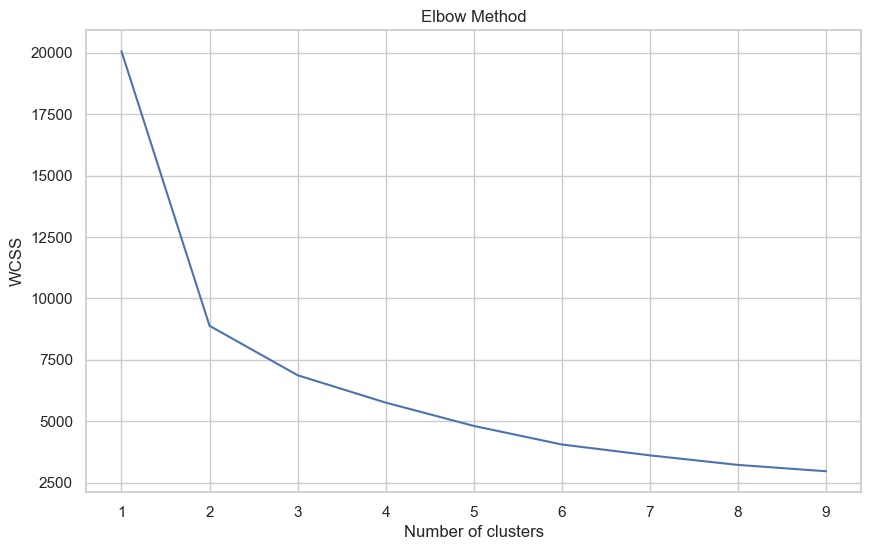

In [77]:
wcss = []
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_prepared)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  
plt.grid(True)
plt.show()

Elbow bend is observed at 6

In [84]:

kmeans = KMeans(n_clusters=6)  
clusters = kmeans.fit_predict(data_prepared)

df['Cluster'] = clusters

In [85]:
df.head(5)

,Customer_ID,Gender,Age,Profession_Code,Work_Experience,Family_Size,Annual_Median,Occupation_Name,Card_Avg,Check_Avg,...,Loan_Payment_Avg,Transfer_Avg,Withdrawal_Avg,Card_Count,Check_Count,Deposit_Count,Loan_Payment_Count,Transfer_Count,Withdrawal_Count,Cluster
0,1000,Male,19,53-0000,1,3,37940,Transportation and Material Moving Occupations,29.70,3323.04,...,22722.13,0.00,793.09,1.0,2.0,1.0,1.0,0.0,2.0,0
1,1001,Female,31,25-3031,6,2,35250,"Substitute Teachers, Short-Term",52.77,7874.51,...,16223.55,2030.74,1539.00,4.0,6.0,1.0,2.0,2.0,1.0,2
2,1002,Male,23,41-0000,1,2,35290,Sales and Related Occupations,0.00,4051.47,...,0.00,0.00,0.00,0.0,1.0,2.0,0.0,0.0,0.0,2
3,1003,Female,35,15-1244,9,4,90520,Network and Computer Systems Administrators,19.48,3339.02,...,25074.55,903.15,1329.38,1.0,2.0,0.0,3.0,1.0,2.0,1
4,1004,Female,24,53-7000,2,1,35670,Material Moving Workers,0.00,5802.39,...,0.00,1515.54,583.86,0.0,4.0,1.0,0.0,3.0,1.0,2


In [86]:
silhouette_avg = silhouette_score(data_prepared,clusters)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.3322971594684295


A better silhouette_score as compared to the previous analysis .

## Method2: Impute the missing values

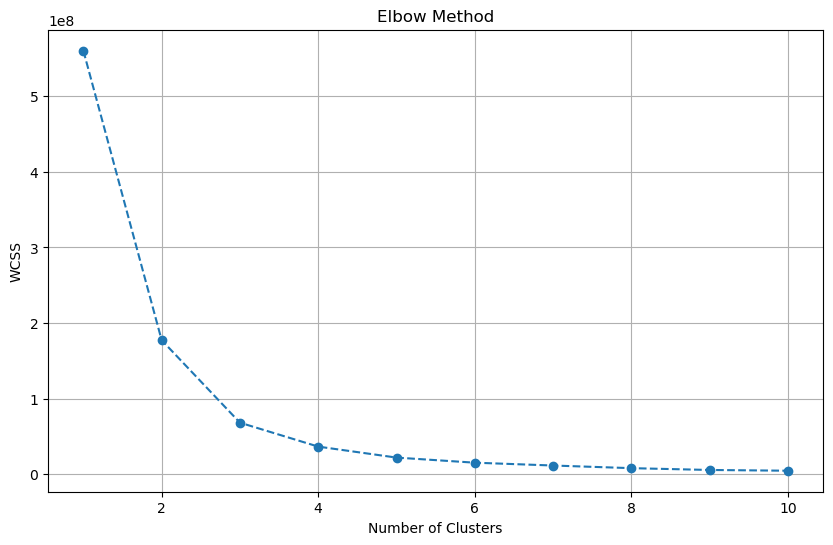

In [3]:

numeric_cols = ['Age', 'Work_Experience', 'Family_Size', 'Annual_Median', 'Card_Avg',
                'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
                'Withdrawal_Avg', 'Card_Count', 'Check_Count', 'Deposit_Count',
                'Loan_Payment_Count', 'Transfer_Count', 'Withdrawal_Count']
categorical_cols = ['Gender', 'Profession_Code']

# Handling missing values for numeric columns by substittuting it with mean of the respective columns
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

# Encoding categorical features
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Profession_Code'] = encoder.fit_transform(df['Profession_Code'])

# Normalizing numeric features
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Combining all columns for clustering
columns_to_cluster = numeric_cols + categorical_cols

wcss = []
for i in range(1, 11):  # Example range from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df[columns_to_cluster])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [4]:

num_clusters = 4 
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
clusters = kmeans.fit_predict(df[columns_to_cluster])

silhouette_avg = silhouette_score(df[columns_to_cluster], clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

df['Cluster'] = clusters


Silhouette Score: 0.59


0.60 Silhouette Score is good score for customer segmentation and clustering applications. We can form four clusters and segment the data accordingly.

### Mathematical procedure
TO check if we need to impute the values based on mean or median.
1. If the distribution follows a standard normal distribution with one peak , then we take mean into consideration.
2. If the data is heavily skewed or if there are outliers , we calculate the median.
3. If the data column has multiple peaks . We can remove them as imputation might not be affective

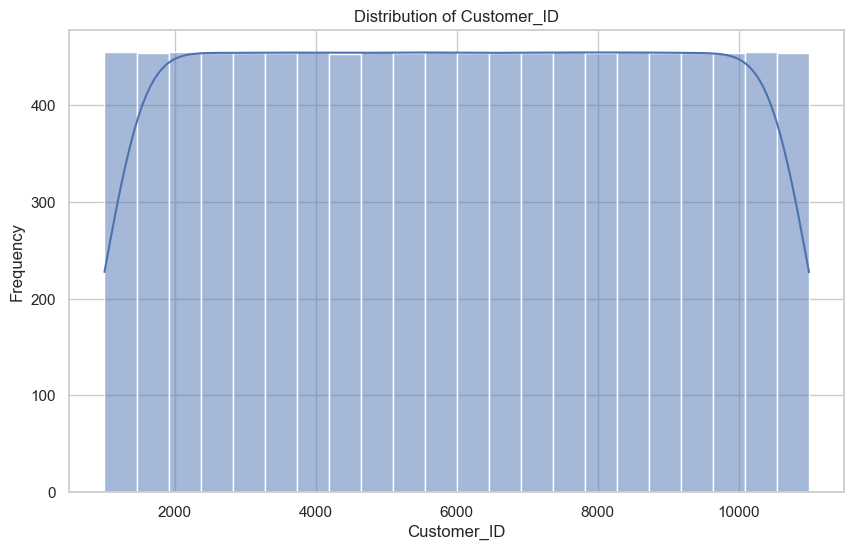

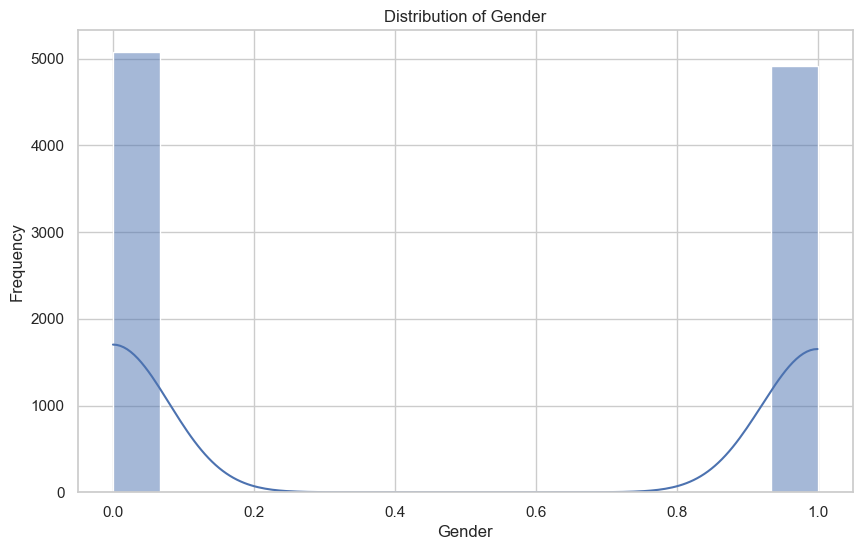

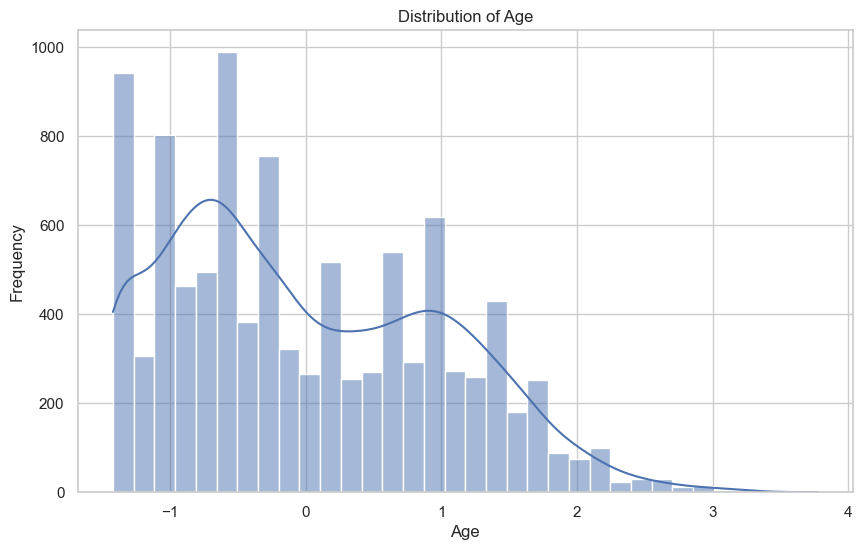

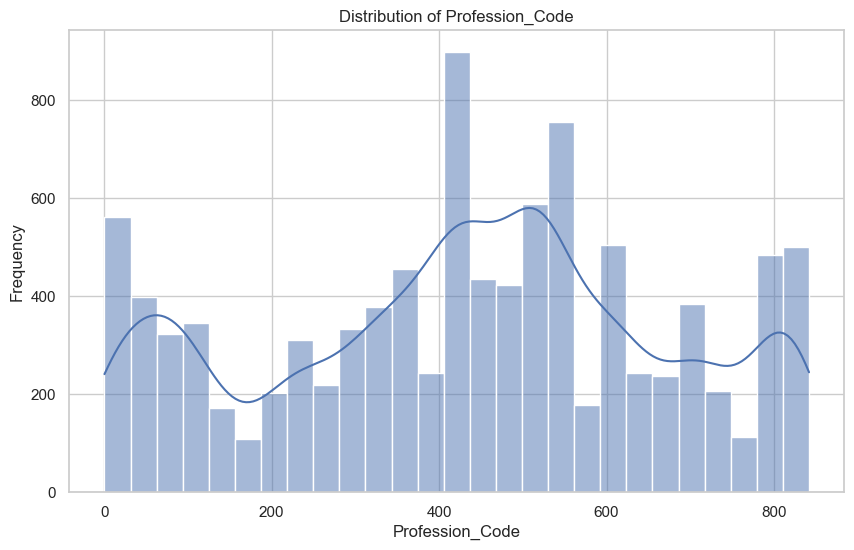

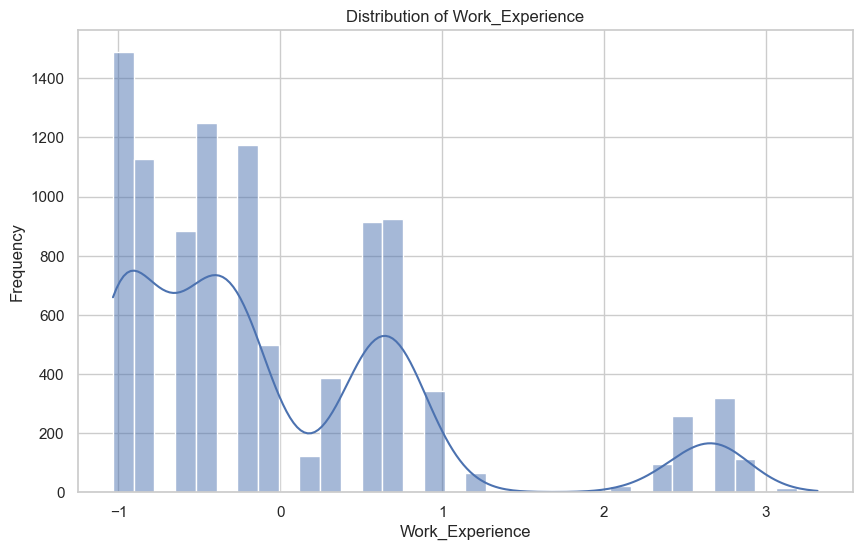

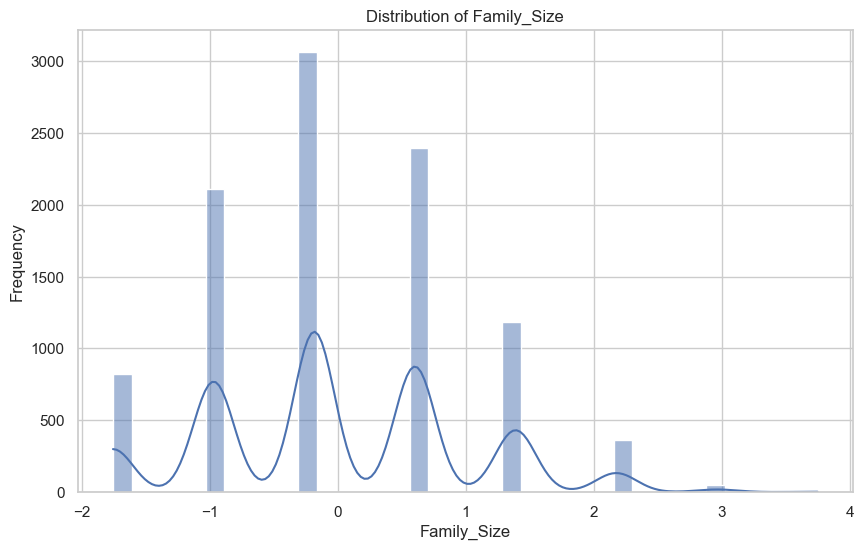

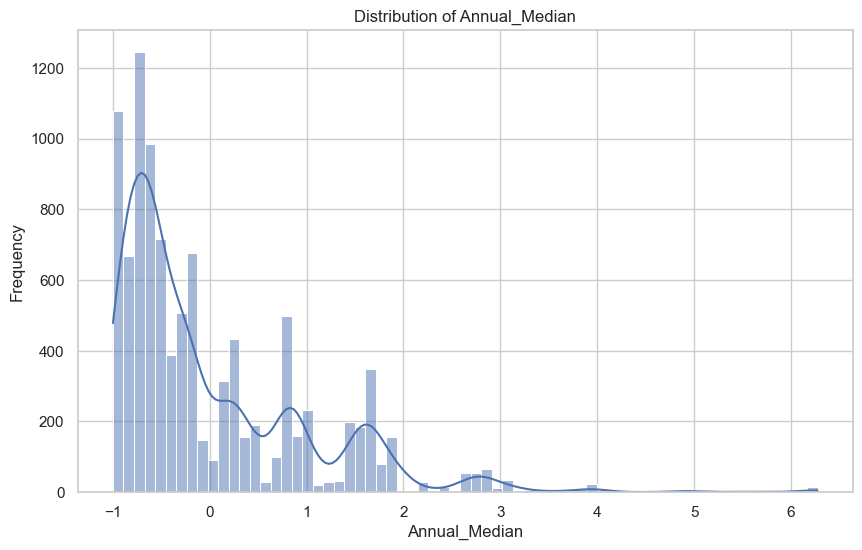

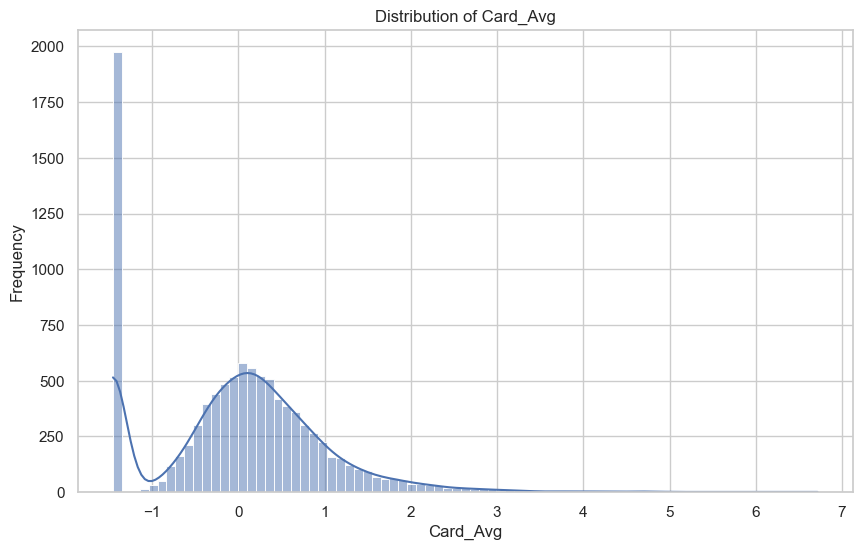

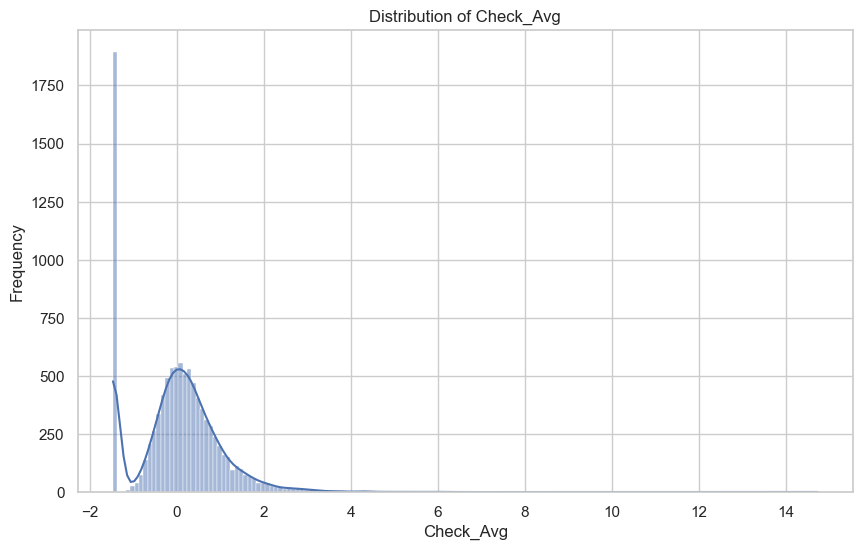

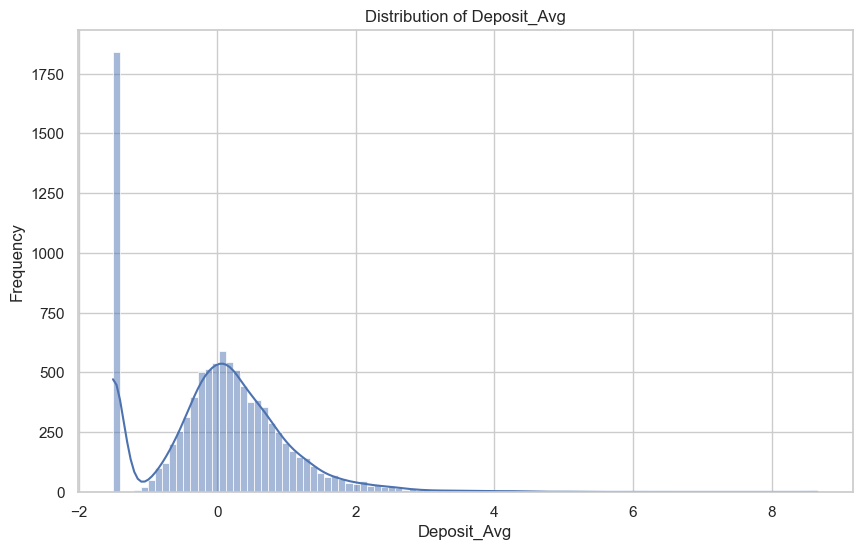

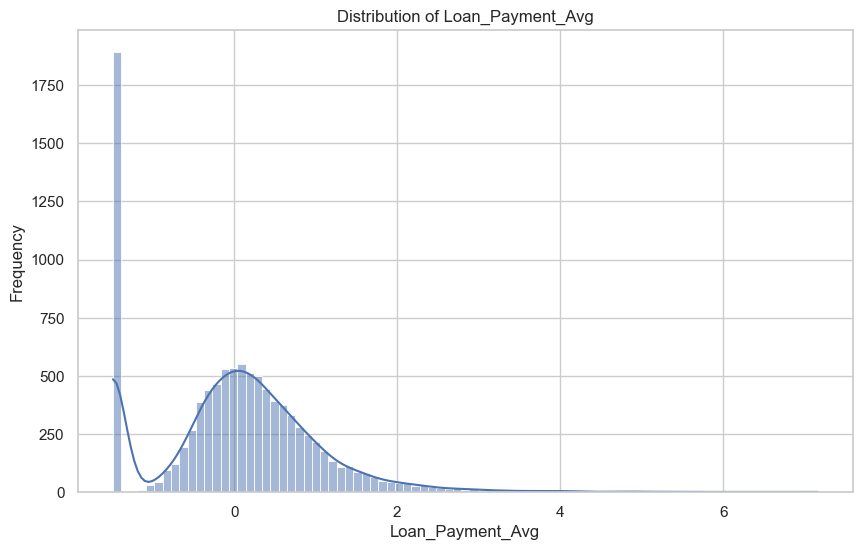

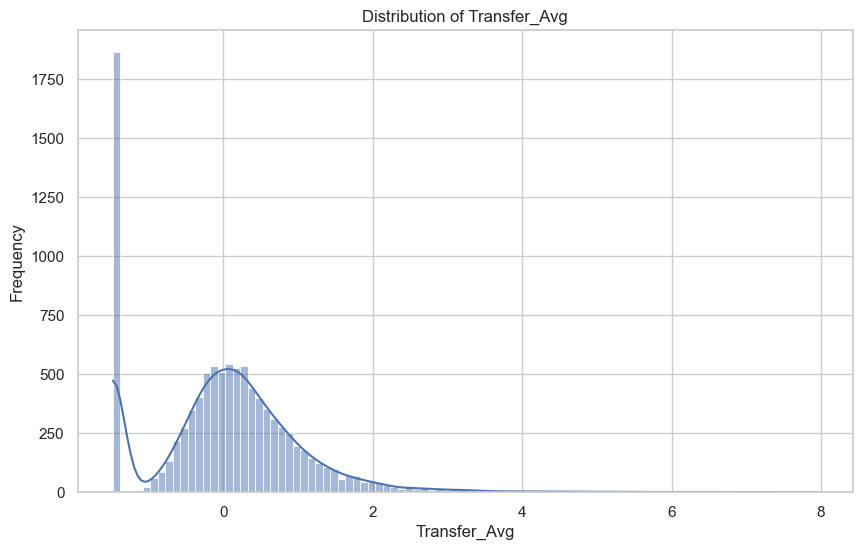

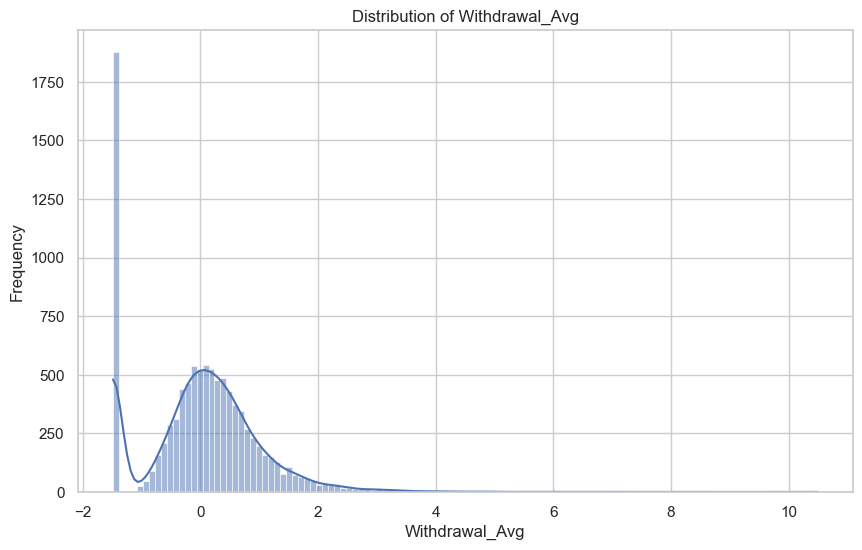

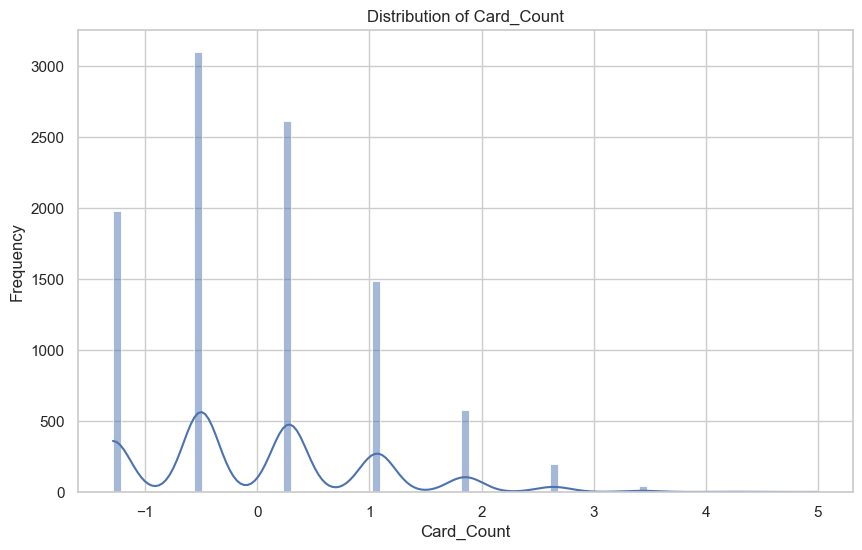

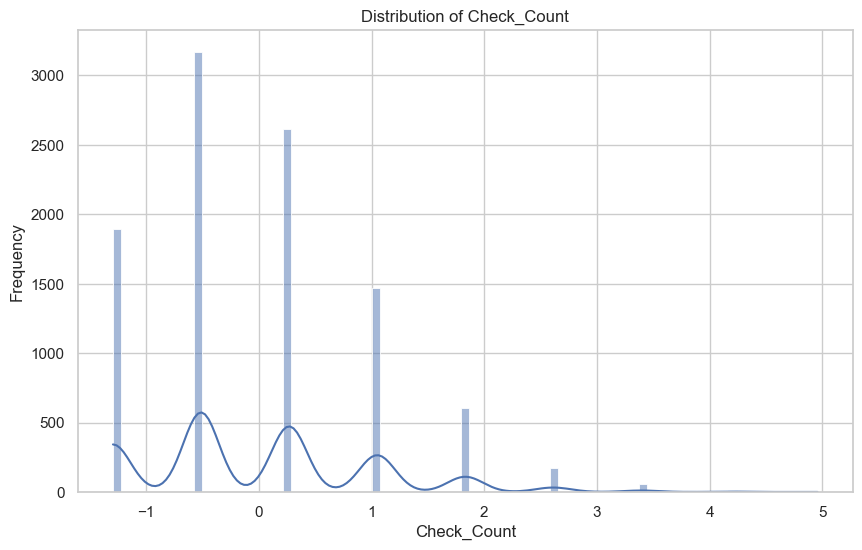

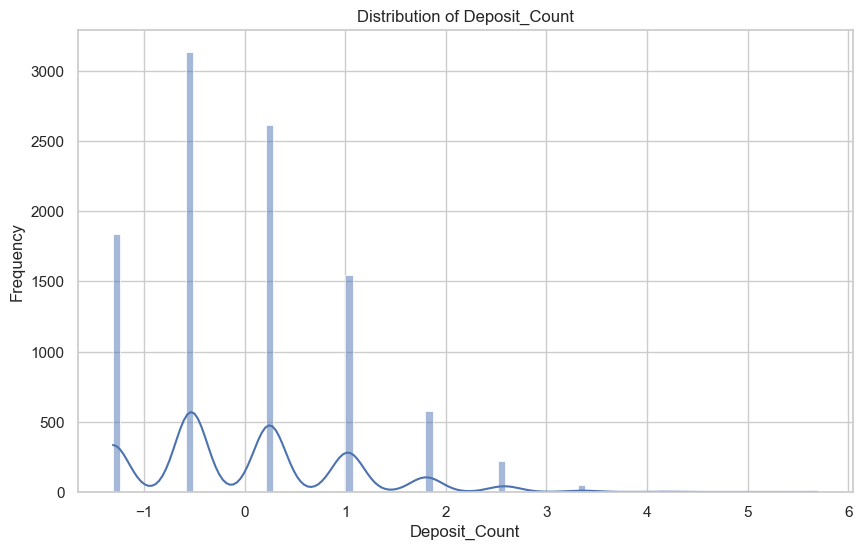

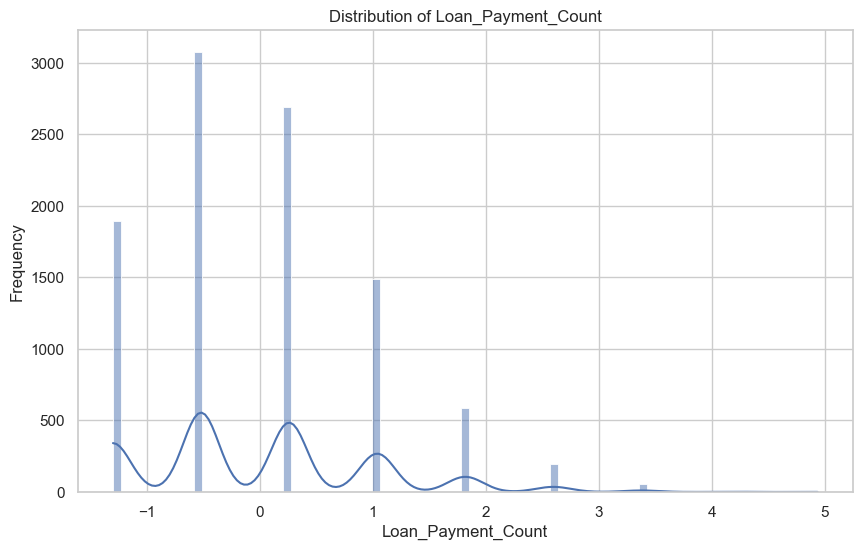

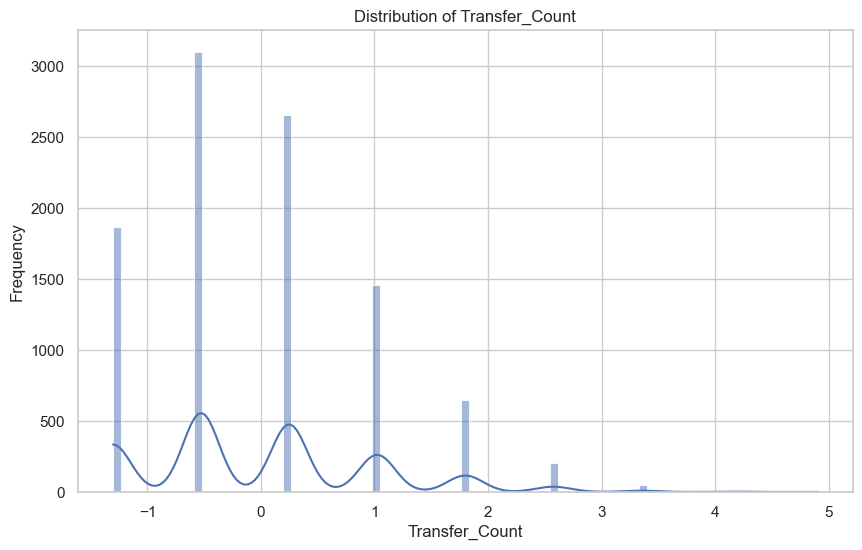

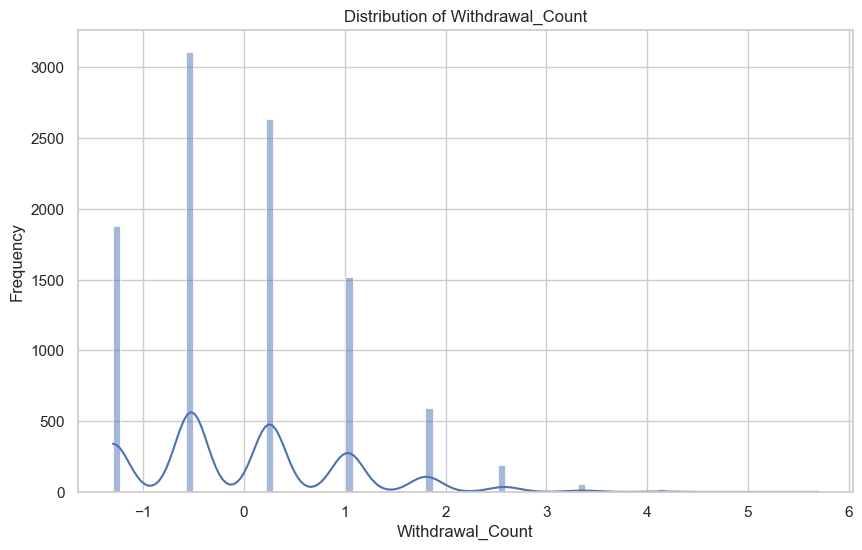

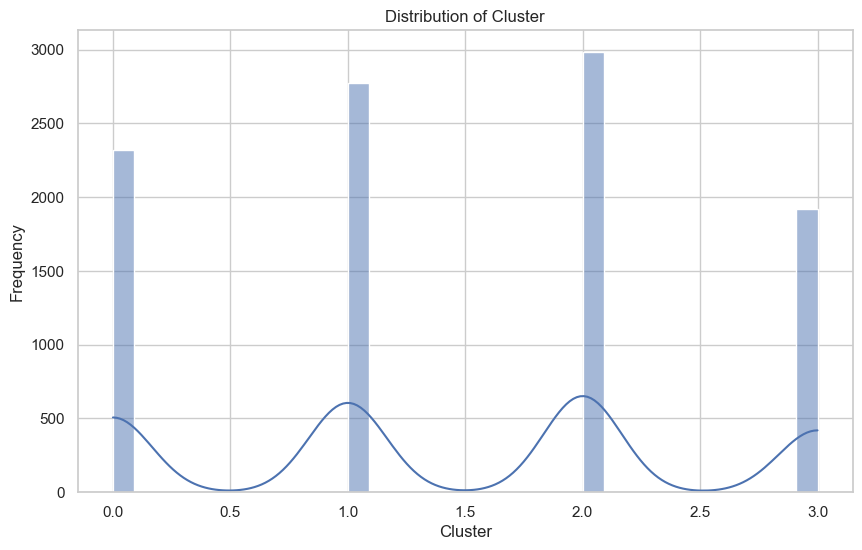

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Loop through each numeric column and plotting a distribution graph
for column in df.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True) 
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

By looking at the various plots we can make a decision of removing all the transaction count columns and family size column. As most of the columns are skewed I use median to fill the values

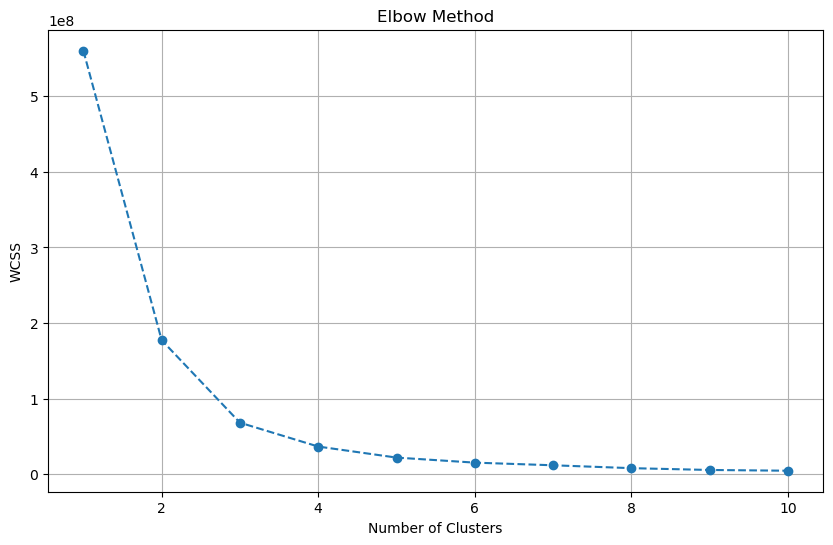

In [36]:

numeric_cols = ['Age', 'Work_Experience', 'Annual_Median', 'Card_Avg',
                'Check_Avg', 'Deposit_Avg', 'Loan_Payment_Avg', 'Transfer_Avg',
                'Withdrawal_Avg']
categorical_cols = ['Gender','Profession_Code']

numeric_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Profession_Code'] = encoder.fit_transform(df['Profession_Code'])

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

columns_to_cluster = numeric_cols + categorical_cols

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11): 
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(df[columns_to_cluster])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [37]:

num_clusters = 5  
kmeans = KMeans(n_clusters=num_clusters, init='k-means++')
clusters = kmeans.fit_predict(df[columns_to_cluster])

silhouette_avg = silhouette_score(df[columns_to_cluster], clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

df['Cluster'] = clusters

Silhouette Score: 0.61


In [20]:
df.head(5)

,Customer_ID,Gender,Age,Profession_Code,Work_Experience,Family_Size,Annual_Median,Occupation_Name,Card_Avg,Check_Avg,...,Loan_Payment_Avg,Transfer_Avg,Withdrawal_Avg,Card_Count,Check_Count,Deposit_Count,Loan_Payment_Count,Transfer_Count,Withdrawal_Count,Cluster
0,1000,1,-1.310678,797,-1.033674,3,-0.610936,Transportation and Material Moving Occupations,-0.811625,-1.033492,...,0.044479,-0.153756,-0.265880,1.0,2.0,1.0,1.0,NaN,2.0,2
1,1001,0,0.015435,269,-0.044685,2,-0.708806,"Substitute Teachers, Short-Term",0.556856,1.015308,...,-0.710839,-0.246733,1.907734,4.0,6.0,1.0,2.0,2.0,1.0,4
2,1002,1,-0.868641,496,-1.033674,2,-0.707351,Sales and Related Occupations,-0.147256,-0.705596,...,-0.153565,-0.153756,-0.146754,NaN,1.0,2.0,NaN,NaN,NaN,1
3,1003,0,0.457473,112,0.548708,4,1.302077,Network and Computer Systems Administrators,-1.417862,-1.026299,...,0.317896,-1.517819,1.296892,1.0,2.0,NaN,3.0,1.0,2.0,0
4,1004,0,-0.758131,827,-0.835876,1,-0.693525,Material Moving Workers,-0.147256,0.082563,...,-0.153565,-0.827497,-0.875586,NaN,4.0,1.0,NaN,3.0,1.0,2


In [45]:

# Create a copy of the original DataFrame
new_df = df.copy()

# Inverse transform numeric columns
new_df[numeric_cols] = scaler.inverse_transform(new_df[numeric_cols])

# Inverse transform label encoded categorical columns
new_df['Gender'] = encoder.inverse_transform(df['Gender'])
new_df['Profession_Code'] = encoder.inverse_transform(new_df['Profession_Code'])

new_df['Cluster'] = clusters






In [47]:
#As age is least correlated .(As seen in the visual_insights.ipynb : We drop it)
new_df=new_df.drop('Gender',axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


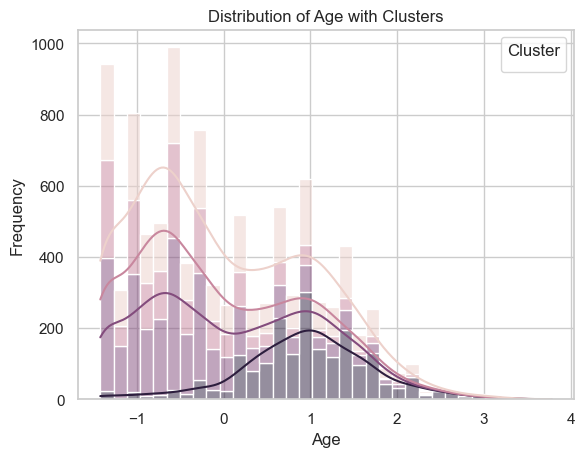

In [96]:
# Plotting
sns.histplot(data=df, x='Age', hue='Cluster', multiple="stack", kde=True)
plt.title('Distribution of Age with Clusters')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Cluster')
plt.show()

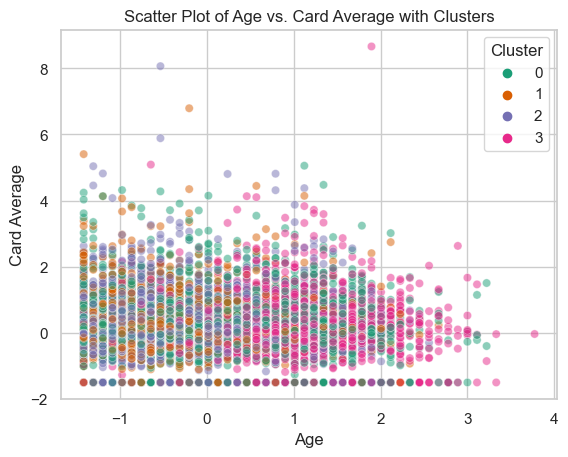

In [97]:
# Scatter plot
sns.scatterplot(data=df, x='Age', y='Deposit_Avg', hue='Cluster', palette='Dark2', alpha=0.5)
plt.title('Scatter Plot of Age vs. Card Average with Clusters')
plt.xlabel('Age')
plt.ylabel('Card Average')
plt.legend(title='Cluster')

plt.show()

In [54]:
df_cluster0=new_df[new_df['Cluster']==0]
df_cluster1=new_df[new_df['Cluster']==1]
df_cluster2=new_df[new_df['Cluster']==2]
df_cluster3=new_df[new_df['Cluster']==3]
df_cluster4=new_df[new_df['Cluster']==4]

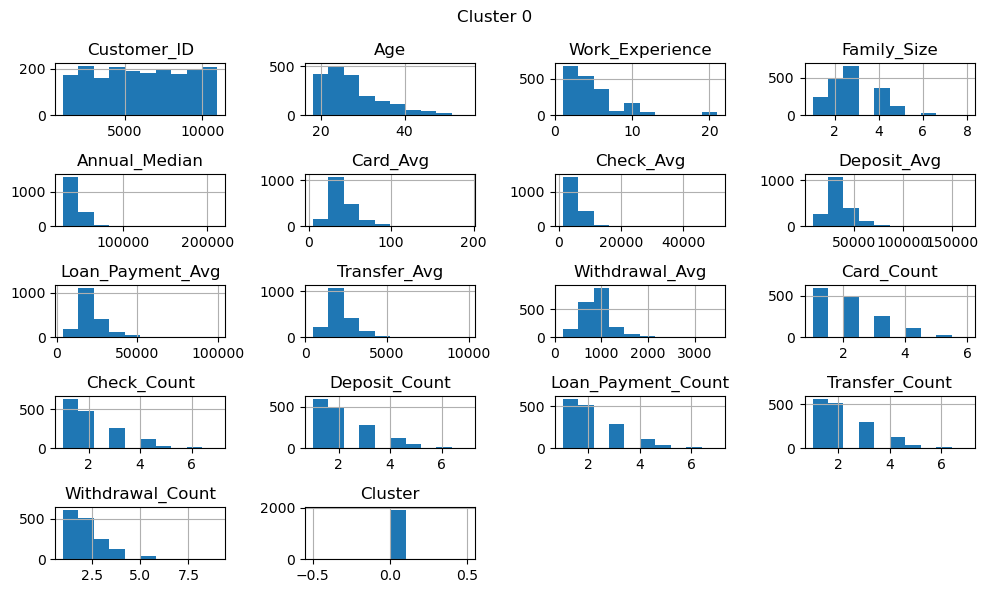

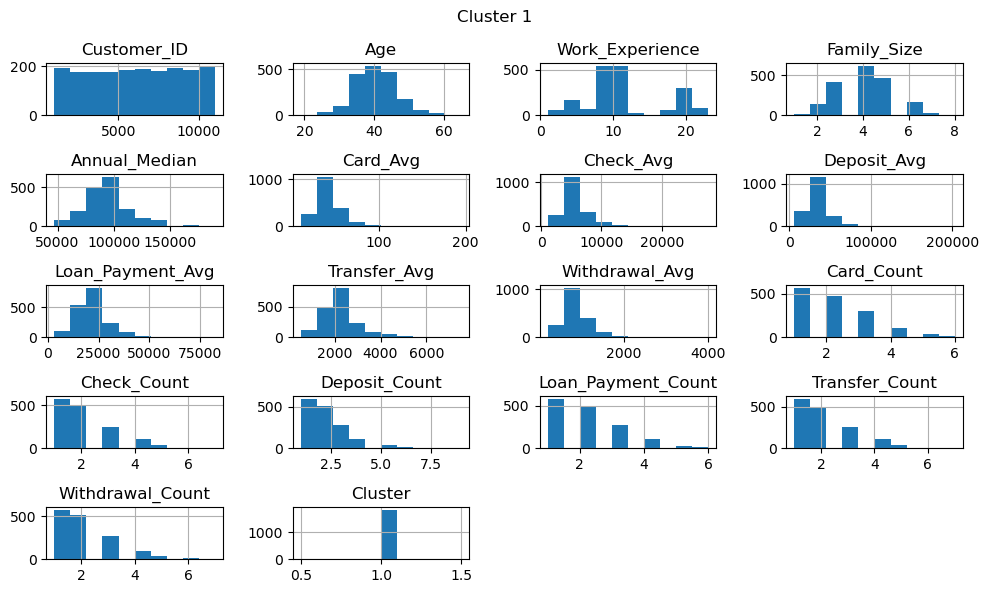

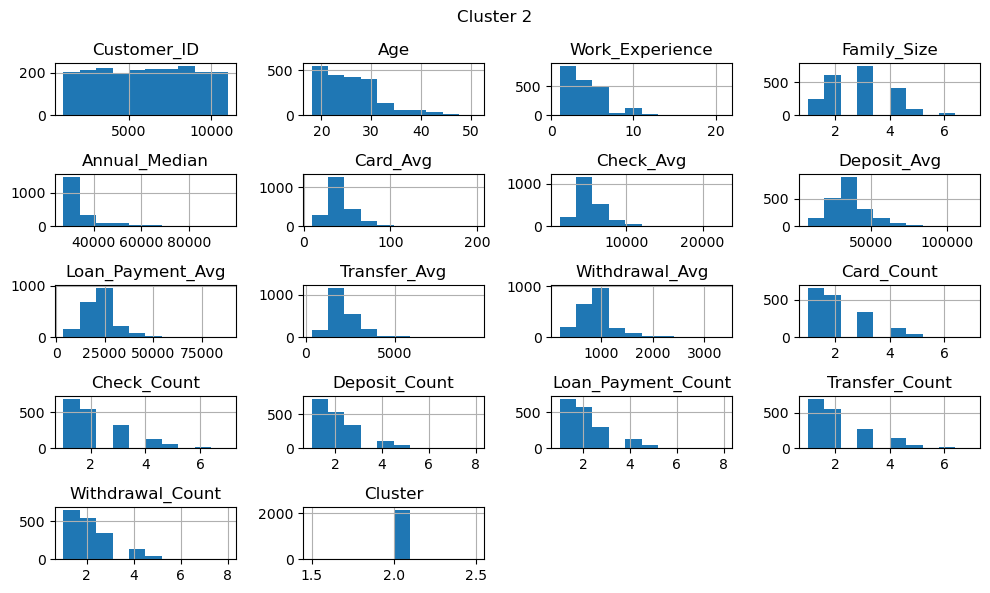

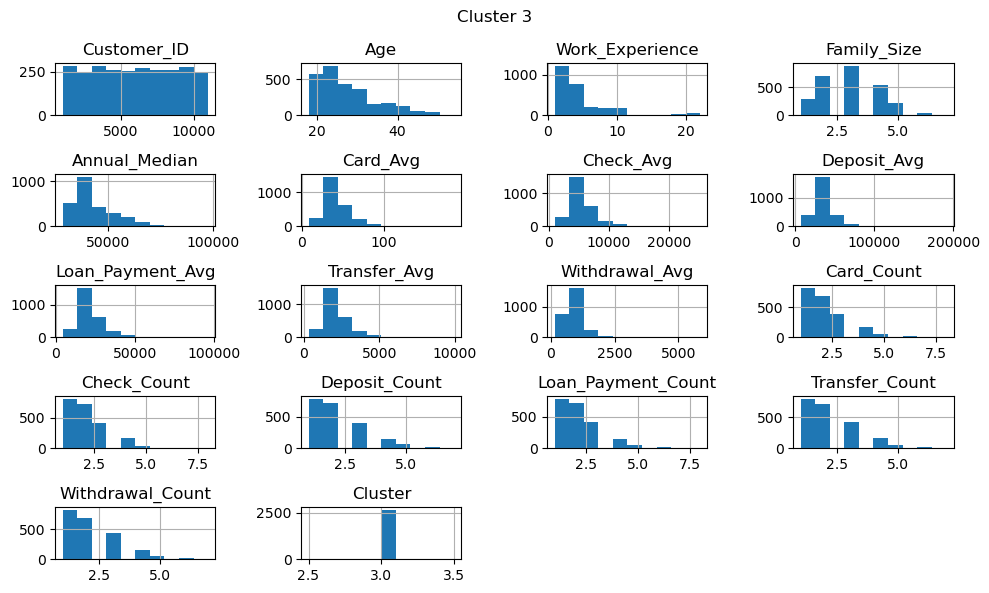

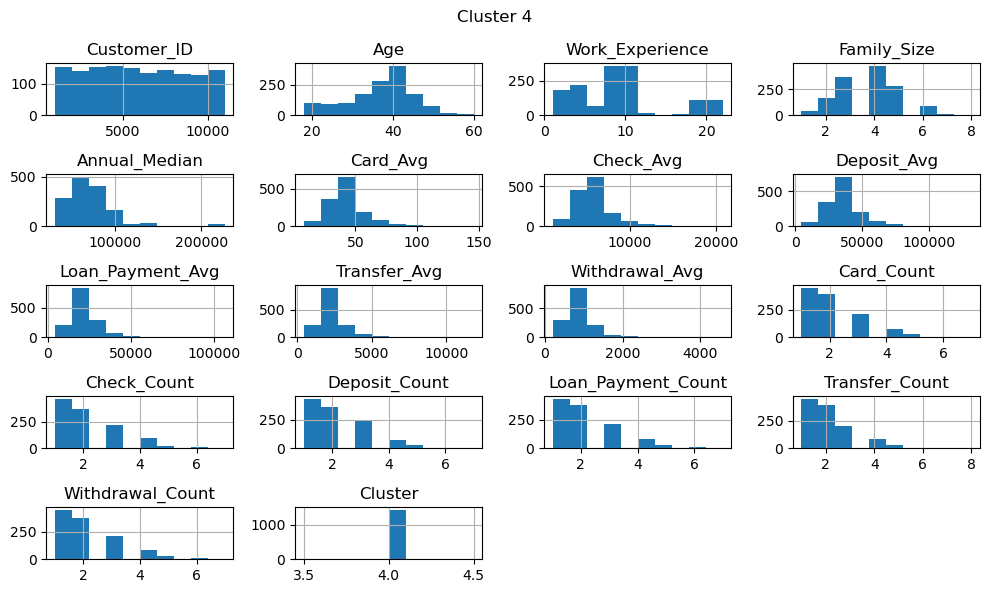

In [64]:
# Compute summary statistics for each cluster
summary_statistics = []
for i in range(0, 5):
    cluster_df = globals()[f"df_cluster{i}"]  # Get the DataFrame for the current cluster
    cluster_stats = cluster_df.describe()  # Compute summary statistics
    summary_statistics.append(cluster_stats)

# Visualize data distribution for each cluster (example: histogram for numeric columns)
import matplotlib.pyplot as plt

for i in range(0, 5):
    cluster_df = globals()[f"df_cluster{i}"]  # Get the DataFrame for the current cluster
    cluster_df.hist(figsize=(10, 6))  # Plot histograms for numeric columns
    plt.suptitle(f'Cluster {i}')
    plt.tight_layout()
    plt.show()



From these plots we can compare each clusters and look at their distributions. 
Key Findings:
1. Clusters 4 and 1 are characterized by customers with higher levels of work experience and older age compared to other clusters. These clusters also exhibit higher annual median salaries compared to others. Moreover, customers in these clusters tend to engage more in deposit activities and have lower instances of loan payments compared to other customers.
2. Clusters 4 and 1 have a lower customer population compared to other clusters. This observation indicates that the segments represented by these clusters constitute a smaller portion of the overall customer base.

Key Insights for Valley Bank:

1. With the understanding that customers in Clusters 4 and 1 are likely to be older,have higher incomes, and engage more in deposit activities, the Valley Bank can tailor marketing campaigns to cater to the needs and preferences of these segments. For example, targeted promotions for retirement planning services or higher-value deposit products could be implemented.

2. Understanding that customers in these clusters have lower instances of loan payments could indicate lower credit risk. However, it's essential to conduct further analysis to assess the underlying factors contributing to this behavior and to ensure prudent risk management practices are maintained.

3. Analyzing the risk profiles of customers within each cluster can aid in assessing credit risk and implementing appropriate risk mitigation measures. For instance, customers in Cluster 3, with their diverse characteristics, may require more risk assessment techniques to ensure responsible lending practices.
